In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('/content/scored_modified_refined_pfd_descriptions.json', 'r') as file:
    data = json.load(file)


In [3]:
score_metrics = ["helpfulness", "correctness", "coherence", "complexity", "verbosity"]
scores = {metric: [] for metric in score_metrics}

for entry in data:
    entry_scores = entry.get("scores", "")
    for metric in score_metrics:
        try:
            # Extract score value using the metric name
            score_value = float(entry_scores.split(f"{metric}:")[1].split(",")[0])
            scores[metric].append(score_value)
        except (IndexError, ValueError):
            continue  # Skip if the score format is incorrect

In [4]:
means = [np.mean(scores[metric]) for metric in score_metrics]
std_devs = [np.std(scores[metric]) for metric in score_metrics]

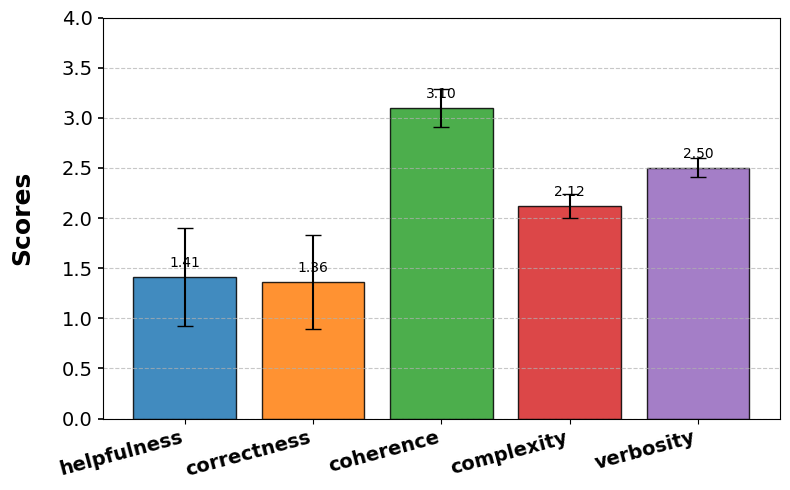

In [5]:
x = np.arange(len(score_metrics))  # Position of bars
fig, ax = plt.subplots(figsize=(8, 5))

# Use a professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create bars with error bars (std deviation)
bars = ax.bar(x, means, yerr=std_devs, capsize=6, color=colors, alpha=0.85, edgecolor='black')

# Add labels and title with professional formatting
# ax.set_xlabel("Score Metrics", fontsize=18, fontweight='bold', labelpad=20)
ax.set_ylabel("Scores", fontsize=18, fontweight='bold', labelpad=20)
# ax.set_title("Mean and Standard Deviation of Score Metrics", fontsize=14, weight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(score_metrics, fontsize=14, fontweight='bold', rotation=15, ha='right')  # Bold and size 14
ax.tick_params(axis='y', labelsize=14, labelcolor='black', width=1.2)  # Bold and size 14 for y-axis ticks
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Set y-axis limit to 4
ax.set_ylim(0, 4)  # Set lower limit to 0 and upper limit to 4

# Add mean values on top of bars
for bar, mean in zip(bars, means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, f'{mean:.2f}', ha='center', fontsize=10)

# Tight layout and save figure
plt.tight_layout()
plt.savefig("novel_chem_score_metrics_plot.pdf", format='pdf')  # Save as a high-resolution PDF
plt.show()
